# Simulated Annealing Implementation

## Basic Implementation

In [1]:
import random

In [2]:
import numpy as np

In [3]:
def f(x):
    return (((x-0.3)*(x-0.3)*(x-0.3)) -(5*x+x*x-2))

In [4]:
class SimulatedAnnealing:
    #solving the problem within the interval [min,max]
    #while T is high: we accept "bad" moves also 
    #if T is low then we only accept good moves
    def __init__(self , min_coordinate ,max_coordinate , min_temp ,max_temp ,tempreduction, cooling_rate =0.02 ):
        self.min_coordinate = min_coordinate
        self.max_coordinate = max_coordinate
        self.min_temp = min_temp
        self.max_temp = max_temp
        self.cooling_rate = cooling_rate
        self.tempreduction = tempreduction
        self.actual_state =0  # it is the x coordinate of the actual state
        self.next_state =0
        self.best_state =0
   
            
    def run(self):    
        temp = self.max_temp
        while temp >self.min_temp:
            new_state = self.generate_next_state()
            actual_energy = self.get_energy(self.actual_state)
            new_energy =self.get_energy(new_state) 
            
            if random.random() <self.accept_prob(actual_energy ,new_energy ,temp):
                self.actual_state = new_state
            if f(self.actual_state)>f(self.best_state):
                self.best_state =self.actual_state
           
            temp = self.temp_decrement(temp)
           # temp =temp  * (1-self.cooling_rate) #decrement the T temperature
        
        print('gloabal maximum = x=%s f(x)=%s ' % (self.best_state ,f(self.best_state)))
     
    
    def temp_decrement(self ,temp):
        if self.tempreduction =="geometric":
            return temp*(1-self.cooling_rate)
        elif self.tempreduction == "linear":      
            return temp - (1-self.cooling_rate)
        elif self.tempreduction == "slowDecrease":       
            return temp/(1+self.cooling_rate*temp)
        else: 
            return self.tempreduction(temp)
            
        
    
    def generate_next_state(self): # generate random x coordinate within the given range [min,max]
        return self.min_coordinate + (self.max_coordinate - self.min_coordinate) *random.random()
    @staticmethod
    def accept_prob(actual_energy,next_energy ,temp):
        if next_energy>actual_energy:
            return 1
        
        return np.exp((actual_energy -next_energy)/temp)
    @staticmethod
    def get_energy(x):
        return f(x)
   

In [5]:
if __name__ == '__main__':
    algorithm  =SimulatedAnnealing(-2,1, .1 ,100 ,"slowDecrease")
    algorithm.run()

gloabal maximum = x=-0.7742382630607463 f(x)=4.032088528225472 


## Travelling Salesman Problem using Simulated Annealing

In [6]:
import random
from random import shuffle
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

In [7]:
class City:
    def __init__(self):
        self.x = 1000*random.random()
        self.y = 1000*random.random()
    def __repr__(self):
        return '(%s,%s)' % (round(self.x,1) ,round(self.y,1))

In [8]:
class SingleTour:
    def __init__(self):
        self.tour =[]
    def set_tour(self,tour):
        self.tour.extend(tour)
    def swap(self,index1 ,index2):
        self.tour[index1], self.tour[index2] = self.tour[index2], self.tour[index1]
    def __repr__(self):
        return ''.join(str(e) for e in self.tour)
    
    def generate_tour(self,n):
        for _ in range(n):
            self.tour.append(City())
            
        shuffle(self.tour)
    
    def get_tour_size(self):
        return len(self.tour)
    
    def get_distance(self):
        tour_distance = 0

        for i in range(len(self.tour)):
            tour_distance += self.distance(self.tour[i % len(self.tour)],
                                           self.tour[(i + 1) % len(self.tour)])

        return tour_distance
    @staticmethod
    def distance(city1, city2):

        dist_x = abs(city1.x - city2.x)
        dist_y = abs(city1.y - city2.y)

        return np.sqrt(dist_x * dist_x + dist_y * dist_y)
    

In [9]:
class simulatedannealing:
    def __init__(self, num_cities, min_temp, max_temp, cooling_rate=0.01):
        self.num_cities = num_cities
        self.min_temp = min_temp
        self.max_temp = max_temp
        self.cooling_rate = cooling_rate
        self.actual_state = SingleTour()
        self.next_state = None
        self.best_state = None

    def run(self):
        self.actual_state.generate_tour(self.num_cities)
        print('Initial (random.random) distance: %sm' % round(self.actual_state.get_distance(), 3))

        self.best_state = self.actual_state
        temp = self.max_temp

        while temp > self.min_temp:
            # generate the neighboring state
            new_state = self.generate_random_state(self.actual_state)

            # calculate the energies (distances)
            actual_energy = self.actual_state.get_distance()
            new_energy = new_state.get_distance()

            if random.random() < self.accept_prob(actual_energy, new_energy, temp):
                single_tour = SingleTour()
                single_tour.set_tour(new_state.tour)
                self.actual_state = single_tour

            if self.actual_state.get_distance() < self.best_state.get_distance():
                single_tour = SingleTour()
                single_tour.set_tour(self.actual_state.tour)
                self.best_state = single_tour

            temp *= 1 - self.cooling_rate

        print('Solution: %sm' % round(self.best_state.get_distance(), 3))
    @staticmethod
    def generate_random_state(actual_state):
        new_state = SingleTour()
        new_state.set_tour(actual_state.tour)
        # we have to swap 2 cities at random
        random_index1 = randint(0, new_state.get_tour_size())
        random_index2 = randint(0, new_state.get_tour_size())

        new_state.swap(random_index1, random_index2)

        return new_state
    def plot_solution(self):
        xs = []
        ys = []

        self.best_state.tour.append(self.best_state.tour[0])

        for city in self.best_state.tour:
            xs.append(city.x)
            ys.append(city.y)

        # these are the cities (points)
        plt.scatter(xs, ys)
        # we connect the cities (and plot the shortest hamiltonian cycle)
        plt.plot(xs, ys)
        plt.show()

    @staticmethod
    def accept_prob(actual_energy, next_energy, temp):

        if next_energy < actual_energy:
            return 1

        return np.exp((actual_energy - next_energy) / temp)

Initial (random.random) distance: 24257.687m
Solution: 9272.179m


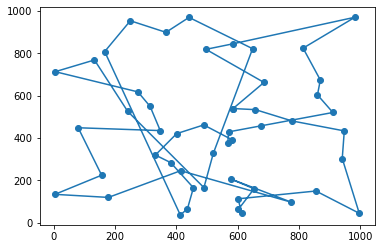

In [10]:
random.seed(10)
if __name__ == '__main__':
    algorithm = simulatedannealing(50, 1e-5, 10000000)
    algorithm.run()
    algorithm.plot_solution()